## **네이버 영화 평점 웹 크롤링**
  + https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200601

In [39]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [40]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

In [41]:
import re
#문자열에서 charset요소값을 찾아줌. charset=euc-kr => euc-kr 반환
def charEncode(st) :
  pt = r'charset[ ]*=[\"\']*([\w-]+)'  #charset[ ]* : 뒤 공백이 있거나 없거나 # [\w-]+ : 문자이거나 -

  charcode = re.search(pt, st)

  if charcode :
    cc = charcode.group(1)
  else :
    cc = 'utf-8'  #charset 을 표기 하지 않은 페이지

  return cc

In [42]:
def urlHtml(url) :
  data = urlopen(url).read() # 바이너리 스트링, 일부를 끊어보내자!
  data1024 = data[:1024]
  #print(type(data1024)) # 끊어도 바이너리 스트링... str으로 강제 변환
  charset = charEncode(str(data1024))  #찾아낸 charset으로 디코드
  html = data.decode(charset, errors='replace')
  return html #html 반환

In [ ]:
#url = input('페이지 주소 입력 :')
url ='https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200601'
print(urlHtml(url))

In [44]:
html = urlHtml(url)
html = bs(html, 'html.parser')

In [ ]:
#title = html.select('.hdline_news > ul > li > .hdline_article_tit')

title = html.select('.tit5')

titlelt=[]
marklt = []

for item in title:
  item = item.getText().replace('\n', '').lstrip() 
  titlelt.append(item)
print(titlelt)

mark = html.select('.point')
for item in mark:
  item = item.getText().replace('\n', '').lstrip() 
  marklt.append(item)
print(marklt)

#리스트 문자열 요소를 실수로 변환
marklt = [float(item) for item in marklt]

#딕셔너리 : 리스트 결합
mvDt = dict(zip(titlelt, marklt))
print(mvDt)

points = list(mvDt.values()) #연습하는 거야... 위에 있는 marklt 써도 됨
print('평점 평균 :', round(sum(points)/len(points),2))


In [46]:
mvnames = list(mvDt.keys())
mvpoint=list(mvDt.values())

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

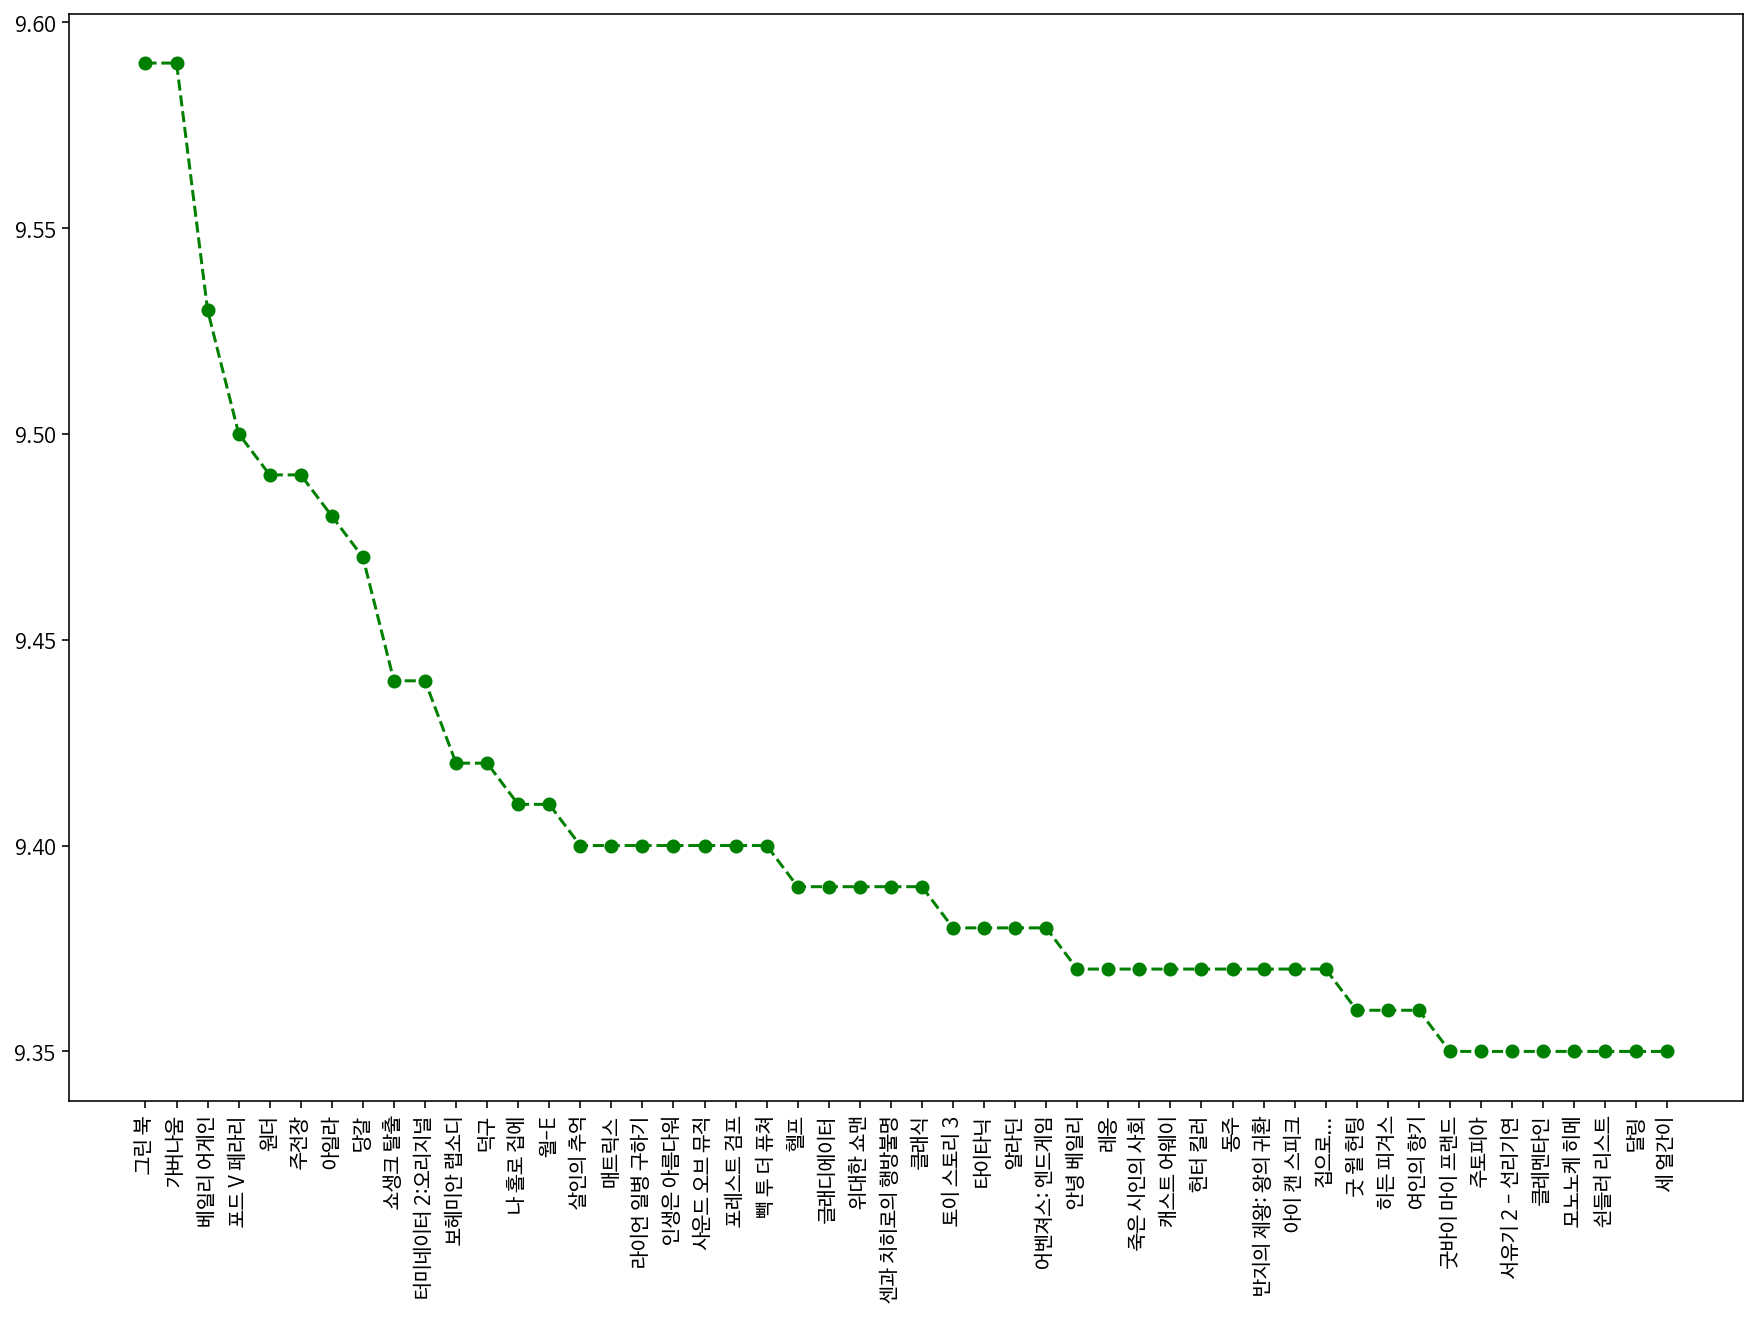

In [48]:
plt.figure(figsize=(15, 10))
plt.plot(mvnames, points, 'go--')
plt.xticks(rotation=90)
plt.show()


In [57]:
boxname = html.select('ul.r_ranking.box a') #Styles
#boxname=[item.getText() for item in boxname]
#print(boxname)
boxname=[item.getText()[2:] for item in boxname]
print(boxname)

boxem= html.select('ul.r_ranking li .ratio em')
boxem=[int(item.text) for item in boxem]
print(boxem)



['#살아있다', '결백', '온워드: 단 하루의 기적', '소리꾼', '다크 나이트']
[255873, 46830, 35868, 34014, 25603]


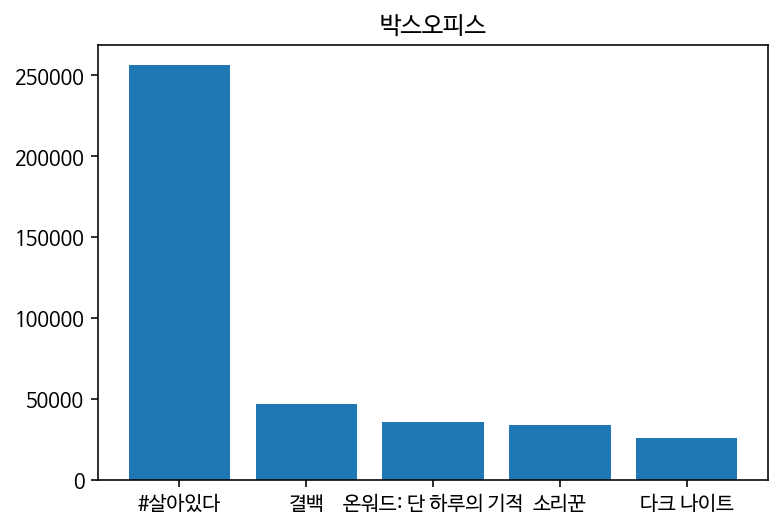

In [52]:
plt.bar(boxname, boxem)
plt.title('박스오피스')
plt.show()